<a href="https://colab.research.google.com/github/akram1903/machine-learning-projects/blob/MNIST_dataset_tensorflow_tutorial/tensorFlowtut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)


2.15.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


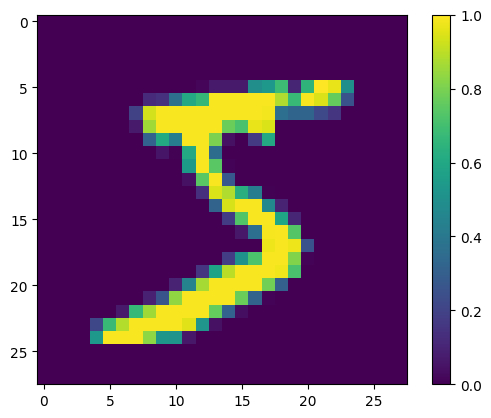

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0


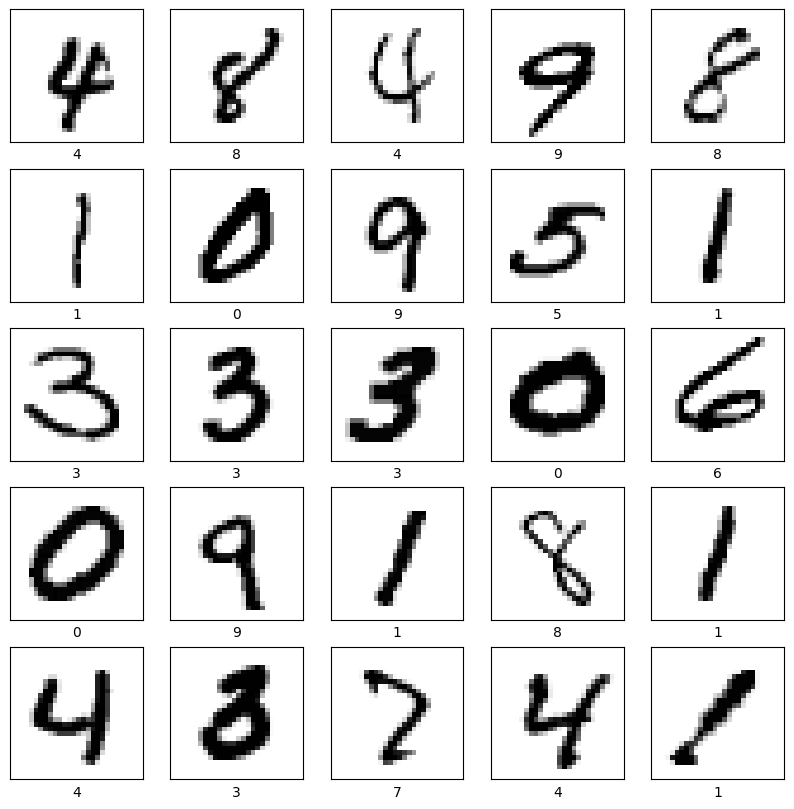

In [ ]:
randomIndices = random.choices(range(60000),k=25)
plt.figure(figsize=(10,10))
index = 0
for i in randomIndices:

    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    index += 1
plt.show()



In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions


array([[-0.6079768 , -0.86264133,  0.59442574,  0.2934947 , -0.46443325,
        -0.11063635,  0.33801788, -0.2914259 ,  0.09305284,  0.51054394]],
      dtype=float32)

In [ ]:
# without dividing by 255
tf.nn.softmax(predictions).numpy()


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 4.7137402e-34,
        0.0000000e+00, 0.0000000e+00, 4.0186343e-29, 0.0000000e+00,
        0.0000000e+00, 5.1344545e-10]], dtype=float32)

In [ ]:
# after dividing by 255
tf.nn.softmax(predictions).numpy()


array([[0.05157532, 0.03997998, 0.17164801, 0.12704164, 0.05953635,
        0.08480749, 0.13282575, 0.07078126, 0.10396694, 0.1578372 ]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


2.4673715

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2952 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1446 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1076 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0864 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0732 - accuracy: 0.9773


In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


In [ ]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.10246894e-07, 2.54842298e-08, 4.26058750e-06, 5.58597858e-05,
        2.61590499e-10, 1.00714317e-06, 2.84528430e-14, 9.99933839e-01,
        5.81057066e-07, 4.18559011e-06],
       [5.25022799e-08, 2.45506835e-05, 9.99942780e-01, 2.86330487e-05,
        2.89350098e-12, 1.68418623e-07, 1.46267297e-07, 5.81082600e-13,
        3.65249298e-06, 1.70663657e-12],
       [6.84319218e-07, 9.99353588e-01, 3.70084308e-05, 5.90792979e-06,
        2.19764061e-05, 1.95897860e-06, 1.09494204e-05, 5.02309820e-04,
        6.19995117e-05, 3.65317896e-06],
       [9.99350011e-01, 5.38399492e-10, 5.74748439e-04, 1.13652197e-06,
        7.27165599e-08, 9.29098348e-07, 9.22815889e-06, 5.00398637e-05,
        7.71565567e-07, 1.30499438e-05],
       [2.19541857e-06, 1.32741956e-10, 4.39236783e-06, 1.06760378e-08,
        9.98394072e-01, 1.29784723e-07, 3.35442849e-07, 1.26724291e-04,
        3.42188855e-08, 1.47207582e-03]], dtype=float32)>

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.0718 - accuracy: 0.9780 - 2s/epoch - 6ms/step

Test accuracy: 0.9779999852180481


In [ ]:
predictions = probability_model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img, class_names):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


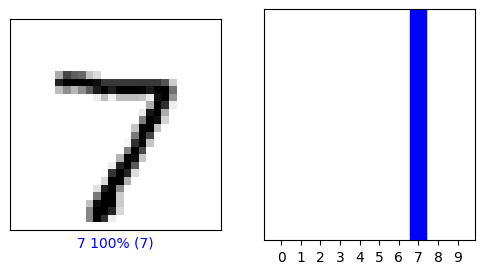

In [ ]:
names = range(10)

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test, names)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


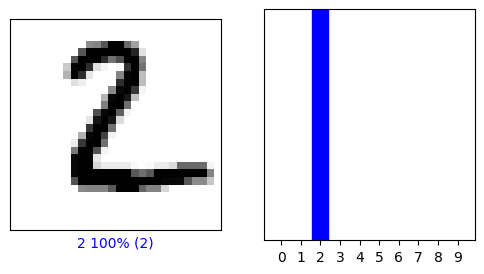

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test, names)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

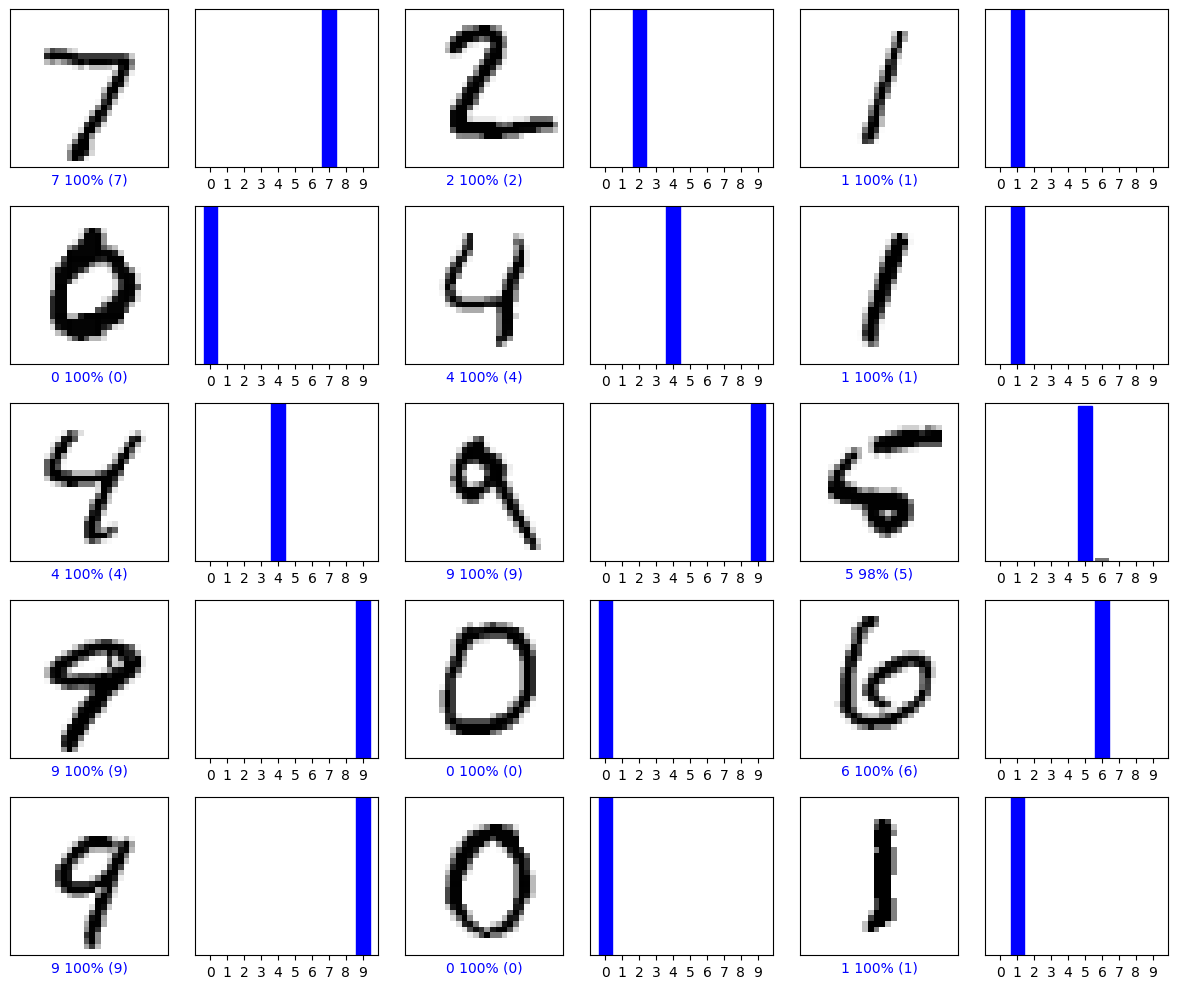

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test,names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


In [ ]:
print(predictions.shape)

(1, 10)
